Get the number of components of the best-fit GMM estimate of $p(x)$ for the $P_\ell$ and GMF analyses

In [1]:
import pickle
import numpy as np 
from sklearn.mixture import GaussianMixture as GMix
# --- ngl ---
from nongausslike import util as UT
from nongausslike import nongauss as NG

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
X_pk = NG.X_pk_all('patchy.z1', NorS='ngc', sys='fc')
X_gmf = NG.X_gmf_all()

In [4]:
X_pk_meansub, _ = NG.meansub(X_pk)
X_gmf_meansub, _ = NG.meansub(X_gmf)

In [5]:
X_pk_w, W_pk = NG.whiten(X_pk_meansub)
X_gmf_w, W_gmf = NG.whiten(X_gmf_meansub)

In [6]:
n_comp_max = 30 # maximum number of components

In [7]:
gmms_pk, bics_pk = [], [] 
for i_comp in range(1, n_comp_max+1): 
    gmm = GMix(n_components=i_comp)
    gmm.fit(X_pk_w)
    gmms_pk.append(gmm)
    bics_pk.append(gmm.bic(X_pk_w))

In [8]:
ibest_pk = np.array(bics_pk).argmin()
gbest_pk = gmms_pk[ibest_pk]

Text(0,0.5,'BIC')

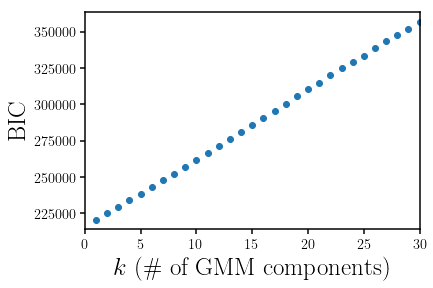

In [9]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(range(1, n_comp_max+1), bics_pk)
sub.set_xlabel('$k$ ($\#$ of GMM components)', fontsize=25)
sub.set_xlim([0., n_comp_max])
sub.set_ylabel('BIC', fontsize=25)

In [10]:
gmms_gmf, bics_gmf = [], [] 
for i_comp in range(1, n_comp_max+1): 
    print i_comp
    gmm = GMix(n_components=i_comp)
    gmm.fit(X_gmf_w)
    bic = gmm.bic(X_gmf_w)
    gmms_gmf.append(gmm)
    bics_gmf.append(gmm.bic(X_gmf_w))

1
454488.08387788024
2
452783.0137234045
3
449934.0275796488
4
449780.4627094996
5
449144.40176198754
6
449840.9399386086
7
449869.28698959947
8
450258.8170397772
9
450449.45290037175
10
450599.4996390487
11
450951.2387750957
12
451265.3471469098
13
451588.5064925787
14
451867.73410604766
15
452235.81601896824
16
452656.68652507704
17
453010.1348398684
18
453308.95920044224
19
453644.8798467905
20
454057.09314222547
21
454447.5775937682
22
454871.9834848489
23
455126.382699778
24
455527.9270506478
25
455819.4225593067
26
456361.087773356
27
456795.31295976654
28
457083.9122547847
29
457384.31410811393
30
457777.01518498454


In [11]:
ibest_gmf = np.array(bics_gmf).argmin()
gbest_gmf = gmms_gmf[ibest_gmf]

In [13]:
gbest_gmf.n_components

5

Text(0,0.5,'BIC')

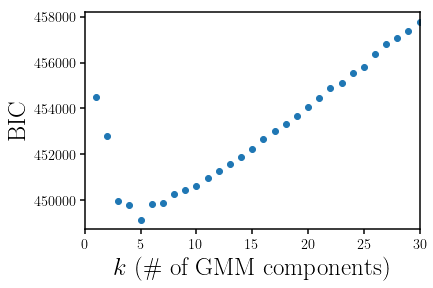

In [12]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(range(1, n_comp_max+1), bics_gmf)
sub.set_xlabel('$k$ ($\#$ of GMM components)', fontsize=25)
sub.set_xlim([0., n_comp_max])
sub.set_ylabel('BIC', fontsize=25)